In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm
from datetime import datetime
from sklearn.preprocessing import StandardScaler

In [45]:
data = pd.read_csv('Walmart.csv')

In [46]:
# Inspect the data
print("Dataset Preview:\n", data.head())

Dataset Preview:
    Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [47]:
print("\nSummary:\n", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB

Summary:
 None


In [48]:
print("\nDescriptive Statistics:\n", data.describe())


Descriptive Statistics:
              Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     2

In [49]:
# Impute missing values with the median for numeric columns only
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

In [50]:
# Handling Missing Values
data = data.fillna(data)
print("\nMissing values filled with median.")


Missing values filled with median.


**Unemployment Rate Analysis**

In [51]:
print("\nPART A: Analyzing effect of Unemployment Rate on Weekly Sales")


PART A: Analyzing effect of Unemployment Rate on Weekly Sales


In [52]:
# Correlation between Weekly Sales and Unemployment Rate
correlation_unemployment = data['Weekly_Sales'].corr(data['Unemployment'])
print(f"Correlation between Weekly Sales and Unemployment Rate: {correlation_unemployment}")

Correlation between Weekly Sales and Unemployment Rate: -0.10617608965795429


In [53]:
# Regression Analysis to identify stores most affected by Unemployment Rate
affected_stores = []
store_ids = data['Store'].unique()

In [54]:
for store in store_ids:
    store_data = data[data['Store'] == store]
    X = store_data[['Unemployment']]
    y = store_data['Weekly_Sales']
    model = LinearRegression().fit(X, y)
    r2 = model.score(X, y)
    affected_stores.append((store, r2))
affected_stores.sort(key=lambda x: x[1], reverse=True)
print("\nStores most affected by Unemployment Rate:")
for store, score in affected_stores[:5]:
    print(f"Store {store}: R2 Score = {score:.2f}")


Stores most affected by Unemployment Rate:
Store 36: R2 Score = 0.70
Store 38: R2 Score = 0.62
Store 44: R2 Score = 0.61
Store 35: R2 Score = 0.23
Store 39: R2 Score = 0.15


**Seasonal Trend Analysis**

In [55]:
# Extract Year and Week from Date if available
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y') # Specify the format as '%d-%m-%Y'
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

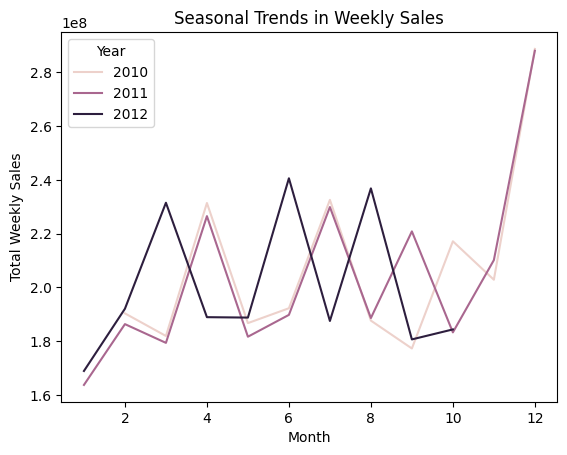

In [56]:
# Aggregate weekly sales by month
df_monthly = data.groupby(['Year', 'Month']).Weekly_Sales.sum().reset_index()
sns.lineplot(x='Month', y='Weekly_Sales', hue='Year', data=df_monthly)
plt.title("Seasonal Trends in Weekly Sales")
plt.xlabel("Month")
plt.ylabel("Total Weekly Sales")
plt.show()

In [57]:
print("Seasonal trend observed where sales spike in holiday months (e.g., November-December).")

Seasonal trend observed where sales spike in holiday months (e.g., November-December).


**Temperature Analysis**

In [58]:
# Correlation between Temperature and Weekly Sales
correlation_temp = data['Weekly_Sales'].corr(data['Temperature'])
print(f"Correlation between Weekly Sales and Temperature: {correlation_temp}")

Correlation between Weekly Sales and Temperature: -0.06381001317946956


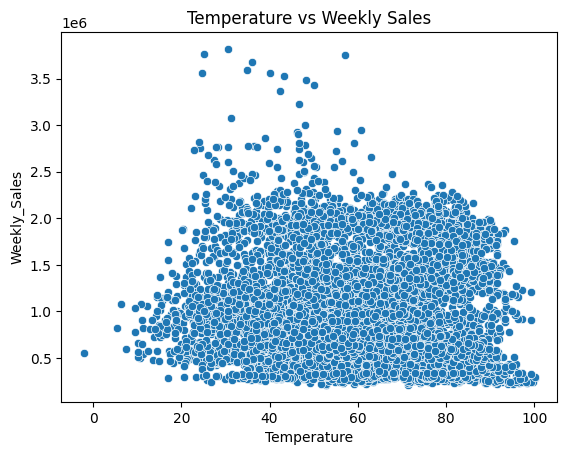

In [59]:
# Scatter Plot
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.title("Temperature vs Weekly Sales")
plt.show()

**Consumer Price Index (CPI)**

In [60]:
print("\nAnalyzing Effect of CPI on Weekly Sales")


Analyzing Effect of CPI on Weekly Sales


In [61]:
# Correlation between CPI and Weekly Sales
correlation_cpi = data['Weekly_Sales'].corr(data['CPI'])
print(f"Correlation between Weekly Sales and CPI: {correlation_cpi}")


Correlation between Weekly Sales and CPI: -0.07263416204017631


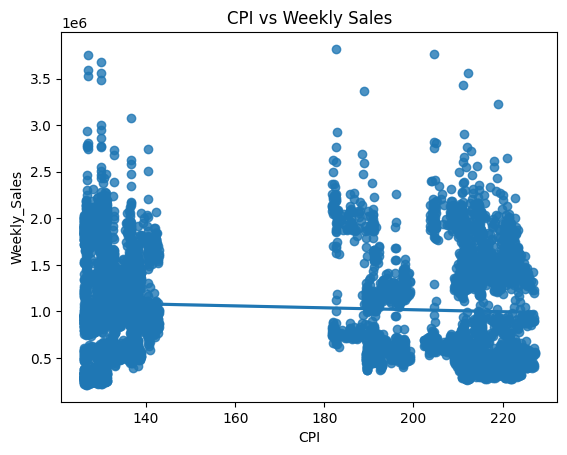

In [62]:
# Regression plot
sns.regplot(x='CPI', y='Weekly_Sales', data=data)
plt.title("CPI vs Weekly Sales")
plt.show()

**Top and Worst Performing Stores**



In [63]:
# Total Sales per Store
total_sales = data.groupby('Store')['Weekly_Sales'].sum().reset_index()
total_sales = total_sales.sort_values(by='Weekly_Sales', ascending=False)

# Top Performing Stores
print("Top 5 Performing Stores:")
print(total_sales.head())

# Worst Performing Store
print("\nWorst Performing Store:")
print(total_sales.tail(1))

# Difference between Highest and Lowest Performing Stores
diff = total_sales['Weekly_Sales'].max() - total_sales['Weekly_Sales'].min()
print(f"\nDifference between Highest and Lowest Performing Store: {diff:.2f}")

Top 5 Performing Stores:
    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08

Worst Performing Store:
    Store  Weekly_Sales
32     33   37160221.96

Difference between Highest and Lowest Performing Store: 264237570.50


***PART 2: Predictive Modeling for Forecasting***


Forecasting for Store 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    1.693358e+06
2012-11-11    1.620154e+06
2012-11-18    1.594745e+06
2012-11-25    2.073905e+06
2012-12-02    1.653565e+06
2012-12-09    1.814153e+06
2012-12-16    1.982550e+06
2012-12-23    2.448516e+06
2012-12-30    1.509116e+06
2013-01-06    1.577890e+06
2013-01-13    1.512378e+06
2013-01-20    1.448782e+06
Freq: W-SUN, dtype: float64

Forecasting for Store 2
2012-11-04    2.019098e+06
2012-11-11    1.994841e+06
2012-11-18    2.023961e+06
2012-11-25    2.733057e+06
2012-12-02    2.090910e+06
2012-12-09    2.452285e+06
2012-12-16    2.667200e+06
2012-12-23    3.493344e+06
2012-12-30    1.893737e+06
2013-01-06    1.881106e+06
2013-01-13    1.858662e+06
2013-01-20    1.858757e+06
Freq: W-SUN, dtype: float64

Forecasting for Store 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    478763.986845
2012-11-11    440557.598327
2012-11-18    426960.941754
2012-11-25    616447.651589
2012-12-02    528289.630054
2012-12-09    520205.709470
2012-12-16    551531.156607
2012-12-23    652540.031859
2012-12-30    438118.968429
2013-01-06    432260.249629
2013-01-13    431201.803040
2013-01-20    403917.232976
Freq: W-SUN, dtype: float64

Forecasting for Store 4
2012-11-04    2.260372e+06
2012-11-11    2.240510e+06
2012-11-18    2.333198e+06
2012-11-25    3.032616e+06
2012-12-02    2.331894e+06
2012-12-09    2.545179e+06
2012-12-16    2.964154e+06
2012-12-23    3.763468e+06
2012-12-30    2.037594e+06
2013-01-06    2.100894e+06
2013-01-13    2.091979e+06
2013-01-20    2.117626e+06
Freq: W-SUN, dtype: float64

Forecasting for Store 5


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    364418.587844
2012-11-11    336035.065299
2012-11-18    332185.059669
2012-11-25    526013.747784
2012-12-02    385614.869445
2012-12-09    389254.994175
2012-12-16    403872.947150
2012-12-23    497508.697689
2012-12-30    346061.974854
2013-01-06    326462.378727
2013-01-13    302058.433394
2013-01-20    311682.010737
Freq: W-SUN, dtype: float64

Forecasting for Store 6


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    1.588049e+06
2012-11-11    1.585483e+06
2012-11-18    1.604454e+06
2012-11-25    2.352267e+06
2012-12-02    1.771978e+06
2012-12-09    1.944409e+06
2012-12-16    2.177008e+06
2012-12-23    2.813477e+06
2012-12-30    1.597910e+06
2013-01-06    1.466003e+06
2013-01-13    1.421740e+06
2013-01-20    1.384109e+06
Freq: W-SUN, dtype: float64

Forecasting for Store 7


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    5.218135e+05
2012-11-11    5.444021e+05
2012-11-18    5.215606e+05
2012-11-25    8.811292e+05
2012-12-02    5.886353e+05
2012-12-09    6.386861e+05
2012-12-16    7.490982e+05
2012-12-23    1.080467e+06
2012-12-30    7.727958e+05
2013-01-06    6.964001e+05
2013-01-13    5.805456e+05
2013-01-20    5.549369e+05
Freq: W-SUN, dtype: float64

Forecasting for Store 8


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    9.956370e+05
2012-11-11    9.798541e+05
2012-11-18    9.546700e+05
2012-11-25    1.330323e+06
2012-12-02    1.024758e+06
2012-12-09    1.140580e+06
2012-12-16    1.289966e+06
2012-12-23    1.583139e+06
2012-12-30    8.498148e+05
2013-01-06    9.465543e+05
2013-01-13    8.841414e+05
2013-01-20    8.970395e+05
Freq: W-SUN, dtype: float64

Forecasting for Store 9
2012-11-04    582774.373011
2012-11-11    585390.912565
2012-11-18    582557.818506
2012-11-25    832162.579427
2012-12-02    642421.912245
2012-12-09    681916.067175
2012-12-16    749287.996419
2012-12-23    937716.650623
2012-12-30    526351.034668
2013-01-06    555342.788920
2013-01-13    521823.708723
2013-01-20    518073.219730
Freq: W-SUN, dtype: float64

Forecasting for Store 10


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    1.836238e+06
2012-11-11    1.919404e+06
2012-11-18    1.928442e+06
2012-11-25    2.937475e+06
2012-12-02    2.217845e+06
2012-12-09    2.415976e+06
2012-12-16    2.769810e+06
2012-12-23    3.709172e+06
2012-12-30    1.753658e+06
2013-01-06    1.716940e+06
2013-01-13    1.720278e+06
2013-01-20    1.687672e+06
Freq: W-SUN, dtype: float64

Forecasting for Store 11
2012-11-04    1.420928e+06
2012-11-11    1.362059e+06
2012-11-18    1.362380e+06
2012-11-25    1.840518e+06
2012-12-02    1.451978e+06
2012-12-09    1.648345e+06
2012-12-16    1.903792e+06
2012-12-23    2.362620e+06
2012-12-30    1.277576e+06
2013-01-06    1.270022e+06
2013-01-13    1.279239e+06
2013-01-20    1.264039e+06
Freq: W-SUN, dtype: float64

Forecasting for Store 12


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    9.946247e+05
2012-11-11    1.011525e+06
2012-11-18    9.461920e+05
2012-11-25    1.635891e+06
2012-12-02    1.108226e+06
2012-12-09    1.175372e+06
2012-12-16    1.334760e+06
2012-12-23    1.778832e+06
2012-12-30    9.795009e+05
2013-01-06    9.571008e+05
2013-01-13    8.625843e+05
2013-01-20    8.523556e+05
Freq: W-SUN, dtype: float64

Forecasting for Store 13


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    2.041338e+06
2012-11-11    2.125651e+06
2012-11-18    2.102937e+06
2012-11-25    2.946176e+06
2012-12-02    2.251902e+06
2012-12-09    2.636971e+06
2012-12-16    2.947775e+06
2012-12-23    3.770545e+06
2012-12-30    1.886452e+06
2013-01-06    1.936196e+06
2013-01-13    1.872947e+06
2013-01-20    1.953899e+06
Freq: W-SUN, dtype: float64

Forecasting for Store 14


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    1.723137e+06
2012-11-11    1.728706e+06
2012-11-18    1.604656e+06
2012-11-25    2.541290e+06
2012-12-02    1.888400e+06
2012-12-09    2.230148e+06
2012-12-16    2.389691e+06
2012-12-23    3.427537e+06
2012-12-30    1.284977e+06
2013-01-06    1.502733e+06
2013-01-13    1.336182e+06
2013-01-20    1.382368e+06
Freq: W-SUN, dtype: float64

Forecasting for Store 15


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    5.848453e+05
2012-11-11    5.907249e+05
2012-11-18    5.770769e+05
2012-11-25    1.080742e+06
2012-12-02    7.155001e+05
2012-12-09    8.031632e+05
2012-12-16    9.338860e+05
2012-12-23    1.304521e+06
2012-12-30    5.321511e+05
2013-01-06    4.869530e+05
2013-01-13    4.503962e+05
2013-01-20    4.646397e+05
Freq: W-SUN, dtype: float64

Forecasting for Store 16


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    468820.792526
2012-11-11    472315.895048
2012-11-18    466403.601590
2012-11-25    670236.347914
2012-12-02    518918.609982
2012-12-09    573936.582043
2012-12-16    659919.858819
2012-12-23    994222.942437
2012-12-30    604916.913082
2013-01-06    574505.300759
2013-01-13    484814.794231
2013-01-20    469931.853670
Freq: W-SUN, dtype: float64

Forecasting for Store 17


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    9.387797e+05
2012-11-11    9.582401e+05
2012-11-18    8.953669e+05
2012-11-25    1.155488e+06
2012-12-02    1.009909e+06
2012-12-09    1.044840e+06
2012-12-16    1.133698e+06
2012-12-23    1.382298e+06
2012-12-30    7.604111e+05
2013-01-06    1.196995e+06
2013-01-13    8.704191e+05
2013-01-20    8.470681e+05
Freq: W-SUN, dtype: float64

Forecasting for Store 18
2012-11-04    1.119064e+06
2012-11-11    1.110144e+06
2012-11-18    1.077410e+06
2012-11-25    1.682198e+06
2012-12-02    1.243514e+06
2012-12-09    1.448167e+06
2012-12-16    1.621087e+06
2012-12-23    2.055401e+06
2012-12-30    9.558830e+05
2013-01-06    9.902717e+05
2013-01-13    8.435010e+05
2013-01-20    9.482807e+05
Freq: W-SUN, dtype: float64

Forecasting for Store 19


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    1.406224e+06
2012-11-11    1.455227e+06
2012-11-18    1.346111e+06
2012-11-25    1.953891e+06
2012-12-02    1.559353e+06
2012-12-09    1.751852e+06
2012-12-16    1.869789e+06
2012-12-23    2.613061e+06
2012-12-30    1.268961e+06
2013-01-06    1.202000e+06
2013-01-13    1.151819e+06
2013-01-20    1.187251e+06
Freq: W-SUN, dtype: float64

Forecasting for Store 20
2012-11-04    2.307532e+06
2012-11-11    2.308413e+06
2012-11-18    2.222715e+06
2012-11-25    2.936888e+06
2012-12-02    2.499476e+06
2012-12-09    2.819956e+06
2012-12-16    2.921253e+06
2012-12-23    3.839400e+06
2012-12-30    1.970227e+06
2013-01-06    1.988564e+06
2013-01-13    2.011014e+06
2013-01-20    1.926891e+06
Freq: W-SUN, dtype: float64

Forecasting for Store 21


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    6.711107e+05
2012-11-11    6.809515e+05
2012-11-18    6.930840e+05
2012-11-25    1.180677e+06
2012-12-02    7.623215e+05
2012-12-09    8.749761e+05
2012-12-16    1.065369e+06
2012-12-23    1.491286e+06
2012-12-30    6.353043e+05
2013-01-06    5.673926e+05
2013-01-13    5.825855e+05
2013-01-20    5.961447e+05
Freq: W-SUN, dtype: float64

Forecasting for Store 22
2012-11-04    1.041757e+06
2012-11-11    1.059179e+06
2012-11-18    1.004364e+06
2012-11-25    1.573350e+06
2012-12-02    1.233259e+06
2012-12-09    1.371650e+06
2012-12-16    1.529722e+06
2012-12-23    1.960981e+06
2012-12-30    8.380617e+05
2013-01-06    8.986135e+05
2013-01-13    8.384892e+05
2013-01-20    8.849753e+05
Freq: W-SUN, dtype: float64

Forecasting for Store 23


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    1.426134e+06
2012-11-11    1.582794e+06
2012-11-18    1.518910e+06
2012-11-25    2.280180e+06
2012-12-02    1.827901e+06
2012-12-09    2.100126e+06
2012-12-16    2.467756e+06
2012-12-23    2.956877e+06
2012-12-30    1.437108e+06
2013-01-06    1.385873e+06
2013-01-13    1.279272e+06
2013-01-20    1.379177e+06
Freq: W-SUN, dtype: float64

Forecasting for Store 24
2012-11-04    1.332305e+06
2012-11-11    1.361897e+06
2012-11-18    1.313860e+06
2012-11-25    1.812939e+06
2012-12-02    1.441185e+06
2012-12-09    1.624705e+06
2012-12-16    1.700421e+06
2012-12-23    2.400528e+06
2012-12-30    1.278823e+06
2013-01-06    1.238174e+06
2013-01-13    1.216809e+06
2013-01-20    1.165309e+06
Freq: W-SUN, dtype: float64

Forecasting for Store 25


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    7.303752e+05
2012-11-11    7.449711e+05
2012-11-18    7.516616e+05
2012-11-25    1.148231e+06
2012-12-02    9.184345e+05
2012-12-09    9.906888e+05
2012-12-16    1.075592e+06
2012-12-23    1.334726e+06
2012-12-30    6.766712e+05
2013-01-06    6.154858e+05
2013-01-13    6.215422e+05
2013-01-20    6.143879e+05
Freq: W-SUN, dtype: float64

Forecasting for Store 26
2012-11-04    1.026264e+06
2012-11-11    1.043190e+06
2012-11-18    9.635578e+05
2012-11-25    1.341822e+06
2012-12-02    1.072929e+06
2012-12-09    1.207797e+06
2012-12-16    1.257617e+06
2012-12-23    1.624736e+06
2012-12-30    9.554813e+05
2013-01-06    1.005202e+06
2013-01-13    8.781599e+05
2013-01-20    8.767548e+05
Freq: W-SUN, dtype: float64

Forecasting for Store 27


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    1.577341e+06
2012-11-11    1.725665e+06
2012-11-18    1.609237e+06
2012-11-25    2.513490e+06
2012-12-02    1.777060e+06
2012-12-09    2.025852e+06
2012-12-16    2.234166e+06
2012-12-23    2.936844e+06
2012-12-30    1.377315e+06
2013-01-06    1.470368e+06
2013-01-13    1.434376e+06
2013-01-20    1.428415e+06
Freq: W-SUN, dtype: float64

Forecasting for Store 28
2012-11-04    1.502349e+06
2012-11-11    1.279015e+06
2012-11-18    1.178532e+06
2012-11-25    1.918949e+06
2012-12-02    1.415867e+06
2012-12-09    1.452213e+06
2012-12-16    1.479738e+06
2012-12-23    1.965341e+06
2012-12-30    1.116489e+06
2013-01-06    1.403018e+06
2013-01-13    1.097152e+06
2013-01-20    1.075623e+06
Freq: W-SUN, dtype: float64

Forecasting for Store 29


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    5.579243e+05
2012-11-11    5.318658e+05
2012-11-18    5.124191e+05
2012-11-25    9.619955e+05
2012-12-02    6.303996e+05
2012-12-09    6.970826e+05
2012-12-16    8.249472e+05
2012-12-23    1.107237e+06
2012-12-30    5.060531e+05
2013-01-06    4.731695e+05
2013-01-13    4.456075e+05
2013-01-20    4.589752e+05
Freq: W-SUN, dtype: float64

Forecasting for Store 30
2012-11-04    466375.446117
2012-11-11    420548.894180
2012-11-18    417713.776070
2012-11-25    448975.658411
2012-12-02    396227.536220
2012-12-09    416911.622041
2012-12-16    430374.351198
2012-12-23    500664.395542
2012-12-30    382268.077273
2013-01-06    441030.385423
2013-01-13    448992.461193
2013-01-20    426787.463228
Freq: W-SUN, dtype: float64

Forecasting for Store 31


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    1.403883e+06
2012-11-11    1.431168e+06
2012-11-18    1.436505e+06
2012-11-25    1.935628e+06
2012-12-02    1.414461e+06
2012-12-09    1.554190e+06
2012-12-16    1.780419e+06
2012-12-23    2.139599e+06
2012-12-30    1.282447e+06
2013-01-06    1.390107e+06
2013-01-13    1.423604e+06
2013-01-20    1.416483e+06
Freq: W-SUN, dtype: float64

Forecasting for Store 32
2012-11-04    1.162871e+06
2012-11-11    1.218692e+06
2012-11-18    1.226489e+06
2012-11-25    1.715275e+06
2012-12-02    1.267546e+06
2012-12-09    1.457447e+06
2012-12-16    1.629727e+06
2012-12-23    2.024362e+06
2012-12-30    1.059365e+06
2013-01-06    1.129666e+06
2013-01-13    1.109407e+06
2013-01-20    1.150909e+06
Freq: W-SUN, dtype: float64

Forecasting for Store 33


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    270621.799276
2012-11-11    302197.460491
2012-11-18    262314.197895
2012-11-25    274741.898722
2012-12-02    244015.945885
2012-12-09    290175.726388
2012-12-16    277617.521817
2012-12-23    285168.609644
2012-12-30    254594.506845
2013-01-06    287727.706271
2013-01-13    302495.338355
2013-01-20    283344.986477
Freq: W-SUN, dtype: float64

Forecasting for Store 34
2012-11-04    1.019984e+06
2012-11-11    1.025313e+06
2012-11-18    9.965293e+05
2012-11-25    1.361402e+06
2012-12-02    1.041710e+06
2012-12-09    1.130324e+06
2012-12-16    1.253687e+06
2012-12-23    1.660688e+06
2012-12-30    9.645806e+05
2013-01-06    9.598946e+05
2013-01-13    9.483326e+05
2013-01-20    9.422672e+05
Freq: W-SUN, dtype: float64

Forecasting for Store 35
2012-11-04    8.338380e+05
2012-11-11    9.395355e+05
2012-11-18    9.025009e+05
2012-11-25    1.835970e+06
2012-12-02    1.036318e+06
2012-12-09    1.150946e+06
2012-12-16    1.364600e+06
2012-12-23    1.840053e+06
2012-12-30    8.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    271313.428199
2012-11-11    290981.177401
2012-11-18    281484.511283
2012-11-25    278897.612350
2012-12-02    232040.679509
2012-12-09    271188.134684
2012-12-16    283619.477444
2012-12-23    289821.235819
2012-12-30    234157.881776
2013-01-06    262411.111527
2013-01-13    281523.586557
2013-01-20    275398.749583
Freq: W-SUN, dtype: float64

Forecasting for Store 37
2012-11-04    557967.254632
2012-11-11    527755.056989
2012-11-18    534665.329635
2012-11-25    533601.842287
2012-12-02    527328.769950
2012-12-09    531897.355007
2012-12-16    548214.268363
2012-12-23    597901.355542
2012-12-30    471799.291148
2013-01-06    560195.640829
2013-01-13    544594.979409
2013-01-20    544588.867338
Freq: W-SUN, dtype: float64

Forecasting for Store 38


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    463903.224096
2012-11-11    427332.611416
2012-11-18    425454.909594
2012-11-25    434129.719311
2012-12-02    434272.933065
2012-12-09    444245.776782
2012-12-16    418081.850713
2012-12-23    445345.566295
2012-12-30    375973.226036
2013-01-06    476108.308334
2013-01-13    435598.673973
2013-01-20    418625.306563
Freq: W-SUN, dtype: float64

Forecasting for Store 39
2012-11-04    1.601402e+06
2012-11-11    1.575641e+06
2012-11-18    1.649982e+06
2012-11-25    2.442241e+06
2012-12-02    1.728212e+06
2012-12-09    1.915745e+06
2012-12-16    2.128604e+06
2012-12-23    2.762535e+06
2012-12-30    1.558172e+06
2013-01-06    1.537530e+06
2013-01-13    1.487316e+06
2013-01-20    1.533104e+06
Freq: W-SUN, dtype: float64

Forecasting for Store 40
2012-11-04    1.018235e+06
2012-11-11    9.897812e+05
2012-11-18    9.032346e+05
2012-11-25    1.218080e+06
2012-12-02    1.052535e+06
2012-12-09    1.162645e+06
2012-12-16    1.229105e+06
2012-12-23    1.694518e+06
2012-12-30    8.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    587437.442449
2012-11-11    554403.905422
2012-11-18    548216.418360
2012-11-25    584941.472181
2012-12-02    502771.511645
2012-12-09    540943.838907
2012-12-16    570157.783145
2012-12-23    596222.884520
2012-12-30    459631.414176
2013-01-06    578237.452279
2013-01-13    568518.764173
2013-01-20    540876.806585
Freq: W-SUN, dtype: float64

Forecasting for Store 44
2012-11-04    332529.199204
2012-11-11    343303.608269
2012-11-18    345307.668034
2012-11-25    365474.681423
2012-12-02    325163.505542
2012-12-09    340414.223323
2012-12-16    342163.888273
2012-12-23    426122.889912
2012-12-30    305066.217026
2013-01-06    353963.291757
2013-01-13    356559.655727
2013-01-20    343462.502358
Freq: W-SUN, dtype: float64

Forecasting for Store 45


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-11-04    7.853078e+05
2012-11-11    7.814268e+05
2012-11-18    7.404157e+05
2012-11-25    1.187976e+06
2012-12-02    8.861386e+05
2012-12-09    1.001958e+06
2012-12-16    1.123661e+06
2012-12-23    1.664199e+06
2012-12-30    7.230380e+05
2013-01-06    6.949588e+05
2013-01-13    6.663910e+05
2013-01-20    6.618449e+05
Freq: W-SUN, dtype: float64


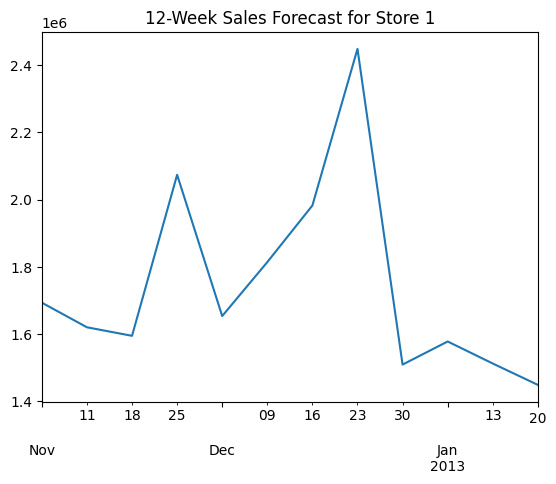

In [31]:
# Sales Forecasting for Each Store
forecast_results = {}
for store in store_ids:
    print(f"\nForecasting for Store {store}")
    store_data = data[data['Store'] == store]
    store_data = store_data.set_index('Date')['Weekly_Sales'].resample('W').sum()

    # Train Holt-Winters Exponential Smoothing Model
    model = ExponentialSmoothing(store_data, trend='add', seasonal='add', seasonal_periods=52)
    fit_model = model.fit()
    forecast = fit_model.forecast(12)

    # Store results
    forecast_results[store] = forecast
    print(forecast)

# Plot Forecast for a Sample Store
store_sample = list(forecast_results.keys())[0]
forecast_results[store_sample].plot(title=f"12-Week Sales Forecast for Store {store_sample}")
plt.show()